# What is the Modern Portfolio Theory (MPT)?

The Modern Portfolio Theory (MPT) refers to an investment theory that allows investors to assemble an asset portfolio that maximizes expected return for a given level of risk. The theory assumes that investors are risk-averse; for a given level of expected return, investors will always prefer the less risky portfolio.

Hence, according to the Modern Portfolio Theory, an investor must be compensated for a higher level of risk through higher expected returns. MPT employs the core idea of diversification – owning a portfolio of assets from different classes is less risky than holding a portfolio of similar assets.

## Portfolio Frontier

According to the Modern Portfolio Theory, a portfolio frontier, also known as an efficient frontier, is a set of portfolios that maximizes expected returns for each level of standard deviation (risk). A typical portfolio frontier is illustrated below:

![Efficient frontier](https://cdn.corporatefinanceinstitute.com/assets/modern-portfolio-theory1.jpeg.png)

The upper portion of the curve (point A onwards) is the “efficient frontier” – it is the combination of risky-assets that maximizes expected return for a given level of standard deviation. Therefore, any portfolio on this portion of the curve offers the best possible expected returns for a given level of risk.

- Point “A” on the efficient frontier is the minimum variance portfolio – the combination of risky-assets that minimizes standard deviation/risk.
- Point “B” is the optimal market portfolio, which consists of at least one risk-free asset. It is depicted by the line that is tangent to the efficient frontier, which is also called the Capital Allocation Line (CAL).

### Capital Allocation Line (CAL)
The Capital Allocation Line (CAL) is a line that depicts the risk-reward tradeoff of assets that carry idiosyncratic risk. The slope of the CAL is called the Sharpe ratio, which is the increase in expected return per additional unit of standard deviation (reward-to-risk ratio).

In the chart above, at point “B,” the reward-to-risk ratio (the slope of the CAL) is the highest, and it is the combination that creates the optimal portfolio according to the MPT.

## Risk-Free Rate

The risk-free rate refers to the rate of return an investor expects to earn on an asset with zero risk. All assets carry some degree of risk; therefore, assets that generally have low default risks and fixed returns are considered risk-free. An example of a risk-free asset is a 3-month government Treasury bill.

https://corporatefinanceinstitute.com/resources/career-map/sell-side/capital-markets/modern-portfolio-theory-mpt/

In [1]:
import yfinance as yt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from tqdm.notebook import tqdm

from pypfopt import EfficientFrontier, plotting, black_litterman
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

from finvizfinance.quote import finvizfinance
from finvizfinance.screener.overview import Overview

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Import stocks from S&P 500 index to choose portfolio from them

In [3]:
# https://finviz.com/screener.ashx
fv_screener = Overview()
fv_screener.set_filter(filters_dict={'Index':'S&P 500'})
stocks_df = fv_screener.screener_view()

In [4]:
stocks_df

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,A,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,4.142000e+10,33.67,141.34,-0.0166,1183942.0
1,AAL,American Airlines Group Inc,Industrials,Airlines,USA,9.060000e+09,12.72,13.84,-0.0226,46582673.0
2,AAPL,Apple Inc,Technology,Consumer Electronics,USA,2.607980e+12,26.28,168.89,-0.0045,53349331.0
3,ABBV,Abbvie Inc,Healthcare,Drug Manufacturers - General,USA,2.965900e+11,61.72,167.90,-0.0532,10408793.0
4,ABNB,Airbnb Inc,Consumer Cyclical,Travel Services,USA,1.013500e+11,21.96,158.84,-0.0031,3535186.0
...,...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc,Industrials,Specialty Industrial Machinery,USA,3.077000e+10,46.78,127.25,-0.0125,1117970.0
499,YUM,Yum Brands Inc.,Consumer Cyclical,Restaurants,USA,3.834000e+10,24.36,136.28,-0.0196,2635936.0
500,ZBH,Zimmer Biomet Holdings Inc,Healthcare,Medical Devices,USA,2.616000e+10,26.10,127.56,-0.0188,1029467.0
501,ZBRA,Zebra Technologies Corp.,Technology,Communication Equipment,USA,1.505000e+10,51.21,292.96,0.0007,389515.0


In [5]:
stocks = stocks_df['Ticker'].to_list()

# 2. Randomly choose 30 stocks for portfolio

In [6]:
stocks = random.sample(stocks, 30)

# 3. Download historical data and prepare dataset

In [7]:
df = yt.download(stocks, period='5y', interval='1d')['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [8]:
sp500 = yt.download('^GSPC', period='5y', interval='1d')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [9]:
# Delete stocks due to insufficient history, if any
df.dropna(axis=1, inplace=True)

In [10]:
df

,ACGL,AES,ANET,BLDR,CB,CFG,CMA,CRM,DE,DOV,...,IVZ,JKHY,KIM,LRCX,PANW,PAYC,ROP,SJM,WRK,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-05,32.590000,15.689130,77.764999,14.200000,125.244408,27.496758,60.774361,158.353149,153.726471,89.283173,...,16.113249,134.001236,14.741122,182.150391,79.616669,182.229904,336.412720,100.210297,34.270248,91.316269
2019-04-08,32.680000,15.448687,79.224998,14.420000,124.852951,27.568319,61.244083,158.263260,153.698547,89.412643,...,16.136845,133.453705,14.621274,180.684982,79.626663,182.994644,334.796326,101.448509,33.986736,90.978256
2019-04-09,32.110001,15.551731,79.297501,14.040000,124.315910,27.003756,60.390759,156.765228,147.951126,87.747940,...,15.963836,133.293228,14.509418,177.772858,80.256668,183.084030,333.997894,102.738327,33.436905,90.877785
2019-04-10,32.340000,15.508796,80.562500,14.150000,125.080544,27.123035,60.649094,160.030960,147.764832,88.025406,...,16.349171,134.105087,14.749107,178.127533,80.839996,186.311890,333.910278,102.385773,33.497051,91.389359
2019-04-11,32.630001,15.525970,80.557503,14.340000,125.608528,27.321821,61.126652,160.520309,149.190002,88.608032,...,16.396353,135.115204,14.597304,178.566238,81.976669,187.295166,337.367065,102.721146,33.505634,92.056236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,92.440002,17.930000,289.980011,208.550003,259.130005,36.290001,54.990002,301.179993,410.739990,177.190002,...,16.590000,173.729996,19.610001,971.570007,284.130005,199.009995,560.840027,125.870003,49.450001,138.649994
2024-04-01,92.309998,18.070000,299.750000,205.410004,257.399994,35.639999,54.110001,302.260010,404.140015,175.529999,...,16.490000,170.460007,19.090000,981.789978,279.420013,198.279999,553.619995,124.730003,49.340000,140.470001
2024-04-02,91.489998,17.820000,290.850006,199.750000,256.339996,35.040001,53.599998,304.000000,404.000000,173.729996,...,16.469999,170.289993,18.889999,967.330017,273.399994,197.669998,545.940002,123.059998,49.270000,140.710007


## Compare chosen stocks with S&P500 benchmark

Annual return: How much your investment grows or shrinks in one year, shown as a percentage.\
Annualized return: Similar to annual return, but it looks at longer periods, like several years.\
Cumulative return: The total overall change in your investment from the start until now, considering all gains and losses.

In [11]:
sp500_returns = (1 + sp500.pct_change()).cumprod() - 1 # Cumulative return
# Same as annualized_sp500_returns = mean_historical_return(sp500, log_returns=False)
annualized_sp500_returns = (1 + sp500.pct_change()).prod() ** (252 / sp500.pct_change().count()) - 1

portfolio_returns = (1 + df.pct_change()).cumprod() - 1
portfolio_weights = np.array([1/len(df.columns)] * len(df.columns)) # equally weighted portfolio
annualized_portfolio_returns = np.dot(mean_historical_return(df, log_returns=False), portfolio_weights)

sp500_annualized_volatility = sp500.pct_change().std(ddof=0) * np.sqrt(252)
portfolio_annualized_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(df.pct_change().cov() * 252, portfolio_weights)))

In [12]:
results = pd.DataFrame()
results = pd.concat([results, pd.DataFrame({'Annualized return':annualized_sp500_returns * 100, 'Annualized volatility':sp500_annualized_volatility*100}, index=['S&P 500'])])
results = pd.concat([results, pd.DataFrame({'Annualized return':annualized_portfolio_returns * 100, 'Annualized volatility':portfolio_annualized_volatility*100}, index=['Portfolio'])])

<Axes: xlabel='Date'>

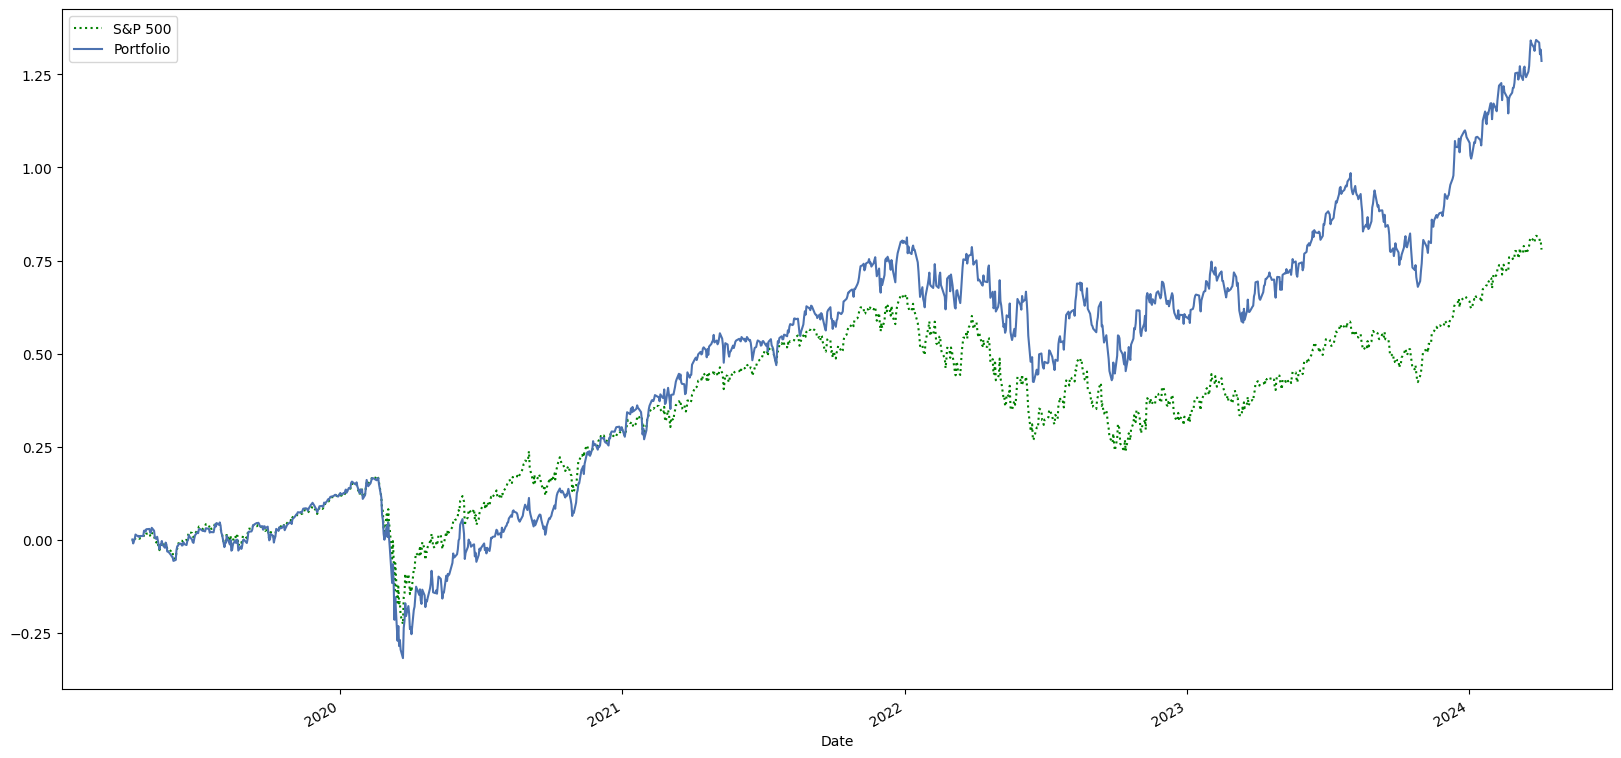

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(sp500_returns, linestyle='dotted', color='green', label='S&P 500')
ax.legend()
# pandas.DataFrame.dot
(portfolio_returns @ portfolio_weights).plot(grid=False, ax=ax, label='Portfolio', legend=True)

## Quick look at the performance of chosen stocks

<Axes: xlabel='Date'>

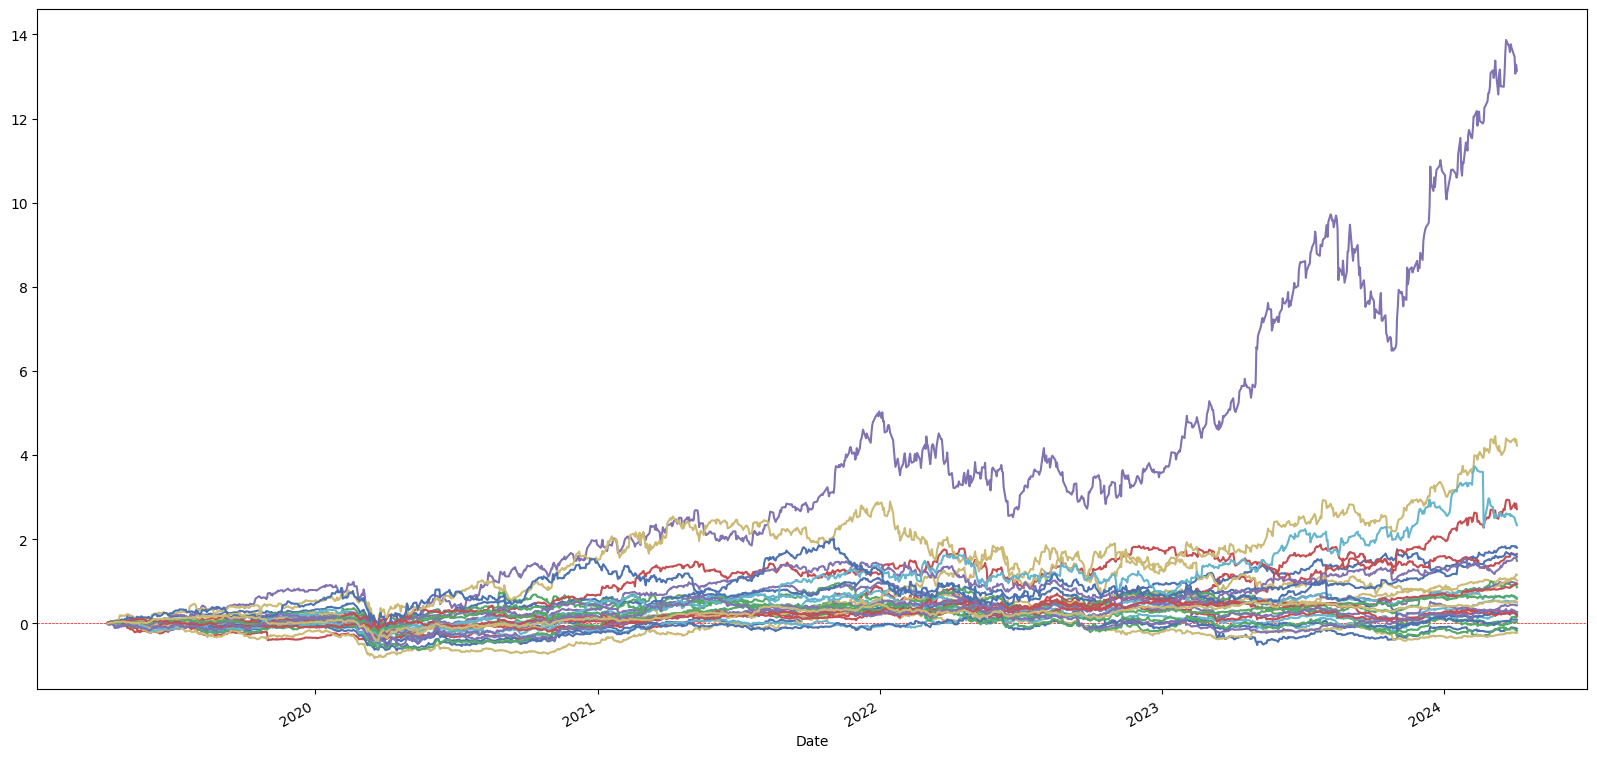

<Figure size 1000x500 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
plt.figure(figsize=(10, 5))
ax.axhline(0, color='red', linewidth = 0.5, linestyle='--')
portfolio_returns.plot(figsize=(20,10), grid=False, legend=False, ax=ax)

<Axes: >

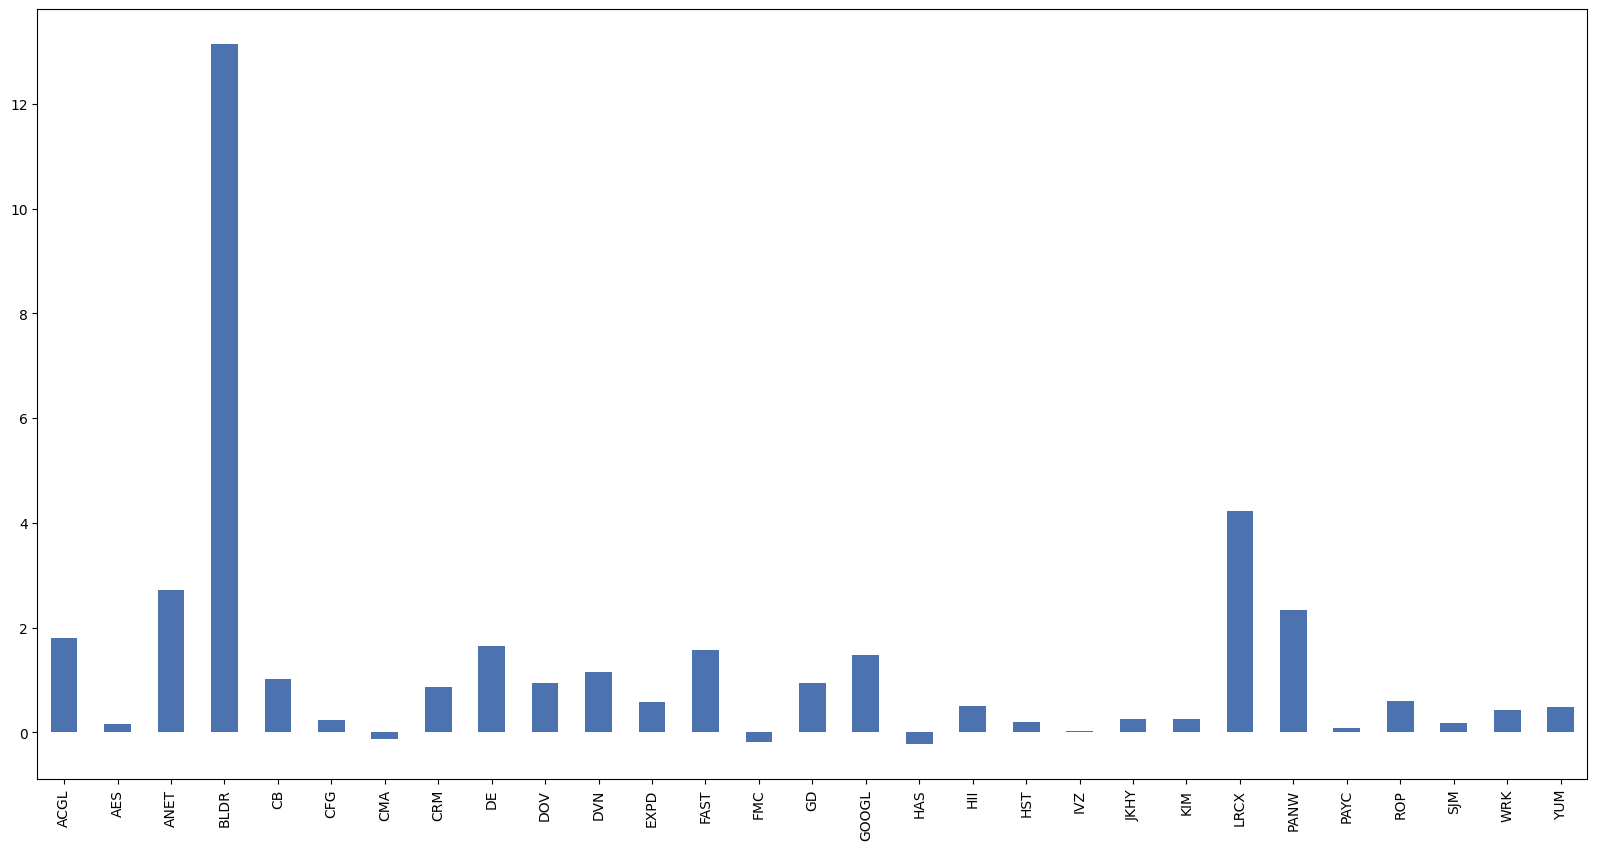

In [15]:
portfolio_returns.iloc[-1].plot(figsize=(20,10), kind='bar')

# 4. Efficient Frontier

In [16]:
money_to_invest = 10000
risk_free_rate = 0.04

In [17]:
mu = mean_historical_return(df, log_returns=True)
S = sample_cov(df)

Expected annual return: 47.9%
Annual volatility: 52.4%
Sharpe Ratio: 0.84

S&P 500 annualized return: 12.25%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 13.23%
Portfolio annualized volatility: 24.91%

Allocation for 10000 USD
BLDR 49




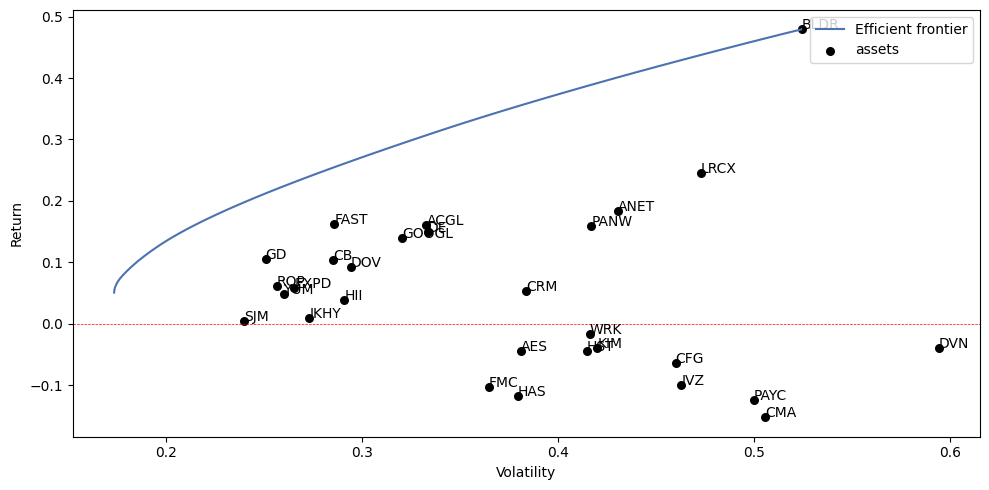

In [18]:
ef = EfficientFrontier(mu, S)
plt.figure(figsize=(10, 5))
ax = plt.subplot()
plotting.plot_efficient_frontier(ef, show_tickers=True)
ax.axhline(0, color='red', linewidth = 0.5, linestyle='--')
weights = ef.clean_weights(cutoff=0.005, rounding=2)
ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

In [19]:
results = pd.concat(
    [results, pd.DataFrame({'Annualized return':ef.portfolio_performance(risk_free_rate=risk_free_rate)[0] * 100, 
                            'Annualized volatility':ef.portfolio_performance(risk_free_rate=risk_free_rate)[1] * 100}, 
                           index=['Efficient Frontier'])]
)

## Optimizations

### Max Sharpe

Expected annual return: 40.1%
Annual volatility: 43.1%
Sharpe Ratio: 0.89

S&P 500 annualized return: 12.25%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 13.23%
Portfolio annualized volatility: 24.91%

Allocation for 10000 USD
ANET 3
BLDR 37
FAST 22




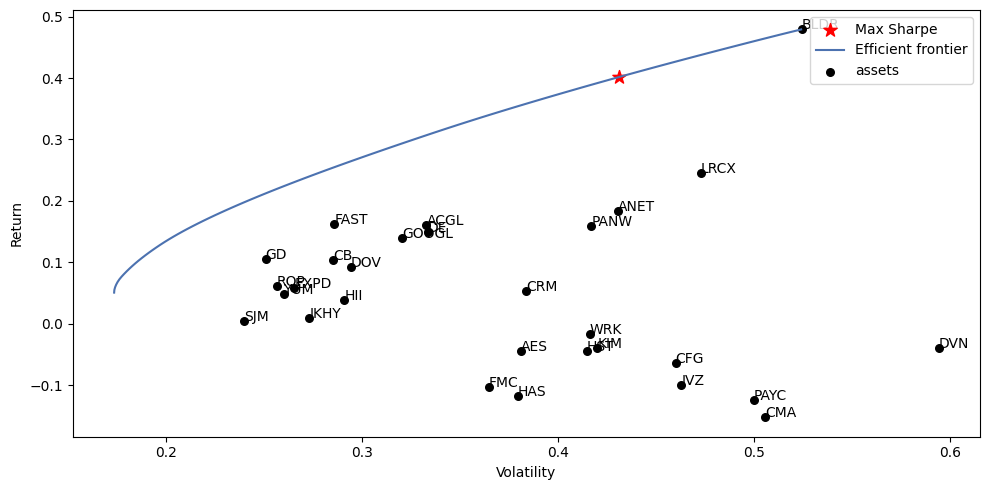

In [20]:
ef = EfficientFrontier(mu, S)
ef_max_sharpe = ef.deepcopy()
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers=True)
weights = ef_max_sharpe.clean_weights(cutoff=0.005, rounding=2)
ef_max_sharpe.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

In [21]:
results = pd.concat(
    [results, pd.DataFrame({'Annualized return':ef_max_sharpe.portfolio_performance(risk_free_rate=risk_free_rate)[0] * 100, 
                            'Annualized volatility':ef_max_sharpe.portfolio_performance(risk_free_rate=risk_free_rate)[1] * 100}, 
                           index=['Max Sharpe'])]
)

### Min Volatility

Expected annual return: 5.1%
Annual volatility: 17.3%
Sharpe Ratio: 0.06

S&P 500 annualized return: 12.25%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 13.23%
Portfolio annualized volatility: 24.91%

Allocation for 10000 USD
AES 1
CB 2
EXPD 10
GD 3
GOOGL 4
HII 2
JKHY 5
KIM 5
PANW 2
SJM 30
YUM 9




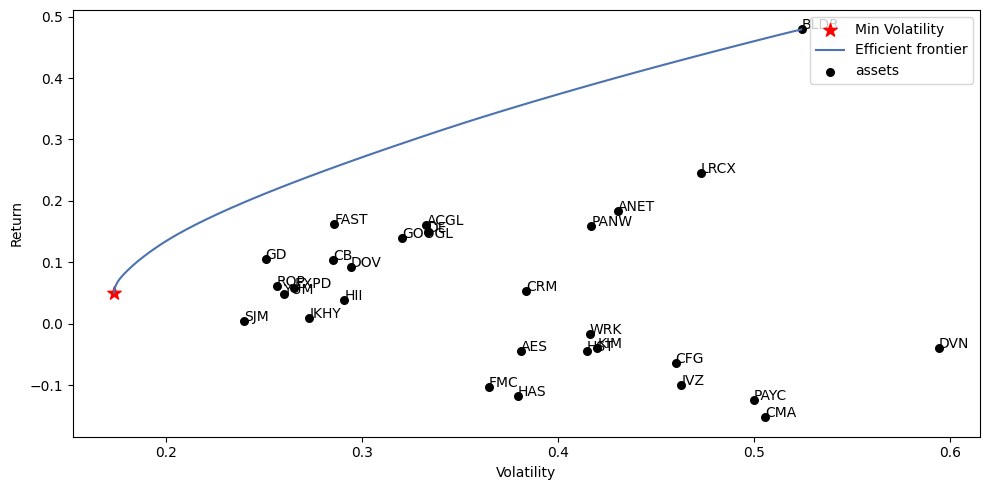

In [22]:
ef = EfficientFrontier(mu, S)
ef_min_volatility = ef.deepcopy()
ef_min_volatility.min_volatility()
ret_tangent, std_tangent, _ = ef_min_volatility.portfolio_performance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers=True)
weights = ef_min_volatility.clean_weights(cutoff=0.005, rounding=2)
ef_min_volatility.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

In [23]:
results = pd.concat(
    [results, pd.DataFrame({'Annualized return':ef_min_volatility.portfolio_performance(risk_free_rate=risk_free_rate)[0] * 100, 
                            'Annualized volatility':ef_min_volatility.portfolio_performance(risk_free_rate=risk_free_rate)[1] * 100}, 
                           index=['Min Volatility'])]
)

# 5. Black-Litterman

Black-Litterman allocation lets investors tweak a traditional investment plan (Modern Portfolio Theory) by adding their own beliefs about future market performance.

Imagine an investor thinks a certain sector will outperform expectations. Black-Litterman lets them factor that view in, alongside historical data, to create a more personalized portfolio strategy.

## Approach 1. Analysts' mean target price from FinViz

Also, you can use any API from readme or whatever.

In [24]:
analysts_views = {}
with tqdm(total=len(df.columns)) as pbar: # progress bar
    for stock in df.columns:
        fv_stock = finvizfinance(stock)
        analysts_views[stock] = float(fv_stock.ticker_fundament()['Target Price'])
        time.sleep(1)
        pbar.update(1)

  0%|          | 0/29 [00:00<?, ?it/s]

## Approach 2. Get mean price from last available analysts' reports

Also, you can use your approach to create your own beliefs about future market performance.

In [21]:
def get_last_targets(stock, targets_from='2000-01-01'):
    s = finvizfinance(stock)
    target_price_df = s.ticker_outer_ratings()
    target_price_df['Date'] = pd.to_datetime(target_price_df['Date'])
    target_price_df = target_price_df[target_price_df['Date'] >= targets_from]
    clear_target = []

    for i in range(len(target_price_df)):
        if len(target_price_df['Price'].iloc[i]) > 0:
            if '→' in target_price_df['Price'][i]:
                target_price_splitted = target_price_df['Price'].iloc[i].split('→')
                ct = target_price_splitted[1]
                ct = str.strip(ct).replace('$', '')
                clear_target.append(float(ct))
            else:
                ct = target_price_df['Price'][i]
                ct = str.strip(ct).replace('$', '')
                clear_target.append(float(ct))
    
    if len(clear_target) == 0:
        last_targets = float(s.ticker_fundament()['Target Price'])
    else:
        # last_targets = sum(clear_target)/len(clear_target)
        last_targets = np.mean(clear_target)
        
    return last_targets

In [22]:
analysts_views = {}
with tqdm(total=len(df.columns)) as pbar: # progress bar
    for stock in df.columns:
        analysts_views[stock] = get_last_targets(stock, targets_from='2024-01-01')
        time.sleep(1)
        pbar.update(1)

  0%|          | 0/30 [00:00<?, ?it/s]

---

In [25]:
viewdict = {key:1-df[key].rolling('30D').mean().iloc[-1]/analysts_views[key] for (key, value) in analysts_views.items()}

In [26]:
print('Upsides:')
for key, value in viewdict.items():
    print(f'{key} {value:.2%}')

Upsides:
ACGL 8.43%
AES 25.34%
ANET 4.26%
BLDR 6.39%
CB 3.73%
CFG 9.69%
CMA 13.38%
CRM 9.83%
DE 7.59%
DOV 1.93%
DVN 11.26%
EXPD -11.98%
FAST -14.35%
FMC 4.71%
GD 3.96%
GOOGL 11.99%
HAS 6.02%
HII 0.98%
HST 10.49%
IVZ 10.11%
JKHY 3.54%
KIM 15.33%
LRCX -3.38%
PANW 15.82%
PAYC 3.42%
ROP 8.62%
SJM 5.52%
WRK -7.08%
YUM 4.81%


## Short and Long Allocation

Expected annual return: 39.4%
Annual volatility: 64.0%
Sharpe Ratio: 0.55

S&P 500 annualized return: 12.25%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 13.23%
Portfolio annualized volatility: 24.91%

Allocation for 10000 USD
ACGL 4
AES 94
CMA 6
CRM 2
DE 1
DVN 2
GOOGL 8
HAS 4
HST 10
IVZ 17
JKHY 1
KIM 31
PANW 3
ROP 3
SJM 11
YUM 1
BLDR -1
CB -6
DOV -7
EXPD -102
FAST -174
HII -6
LRCX -3
PAYC -7
WRK -106




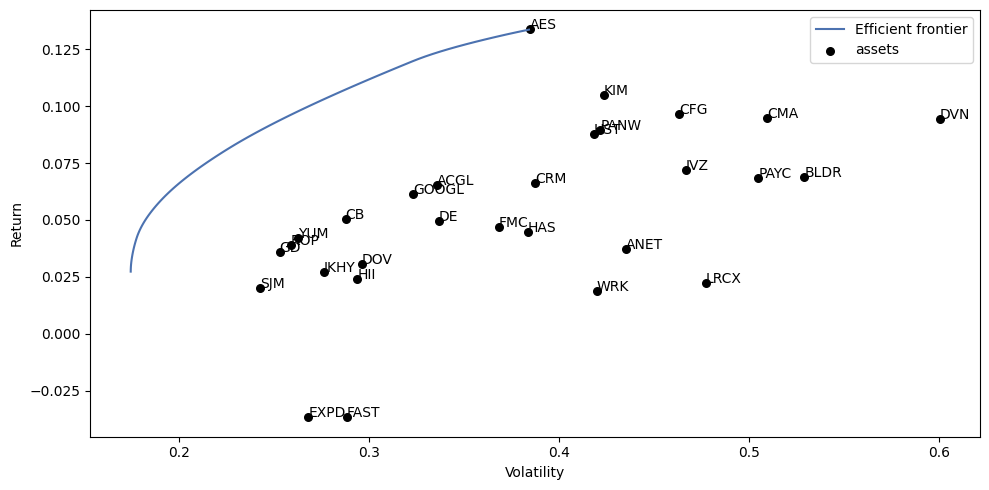

In [27]:
bl = black_litterman.BlackLittermanModel(S, absolute_views=viewdict)
rets = bl.bl_returns()
cov = bl.bl_cov()
ef = EfficientFrontier(rets, cov)
bl.bl_weights()
plt.figure(figsize=(10, 5))
plotting.plot_efficient_frontier(ef, show_tickers=True)
bl.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

latest_prices = get_latest_prices(df)
weights = bl.clean_weights(cutoff=0.005, rounding=2)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

In [28]:
results = pd.concat(
    [results, pd.DataFrame({'Annualized return':bl.portfolio_performance(risk_free_rate=risk_free_rate)[0] * 100, 
                            'Annualized volatility':bl.portfolio_performance(risk_free_rate=risk_free_rate)[1] * 100}, 
                           index=['BL Short and Long'])]
)

## Long only Allocation

[How to prevent negative weights / shorting with BlackLittermanModel](https://github.com/robertmartin8/PyPortfolioOpt/issues/371)

Expected annual return: 13.4%
Annual volatility: 38.4%
Sharpe Ratio: 0.24

S&P 500 annualized return: 12.25%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 13.23%
Portfolio annualized volatility: 24.91%

Allocation for 10000 USD
AES 551




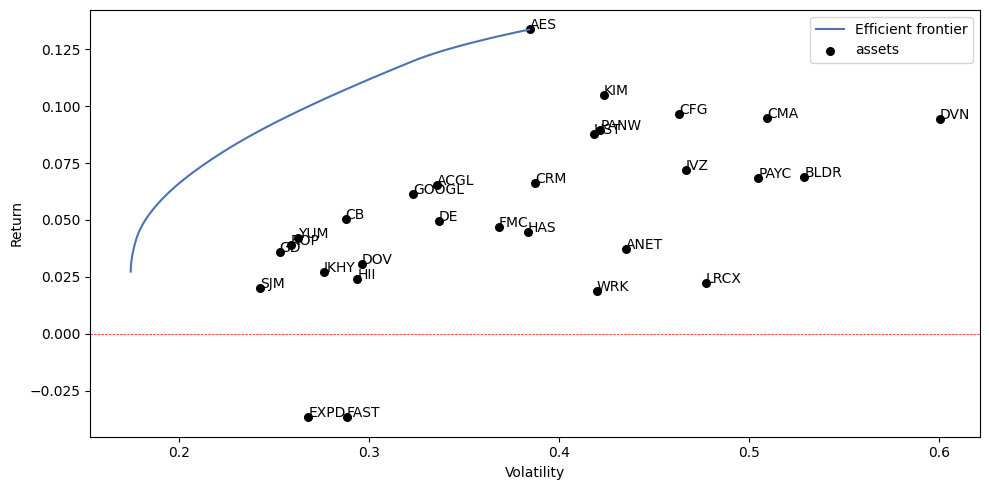

In [29]:
bl = black_litterman.BlackLittermanModel(S, absolute_views=viewdict)
rets = bl.bl_returns()
cov = bl.bl_cov()
ef = EfficientFrontier(rets, cov)
plt.figure(figsize=(10, 5))
ax = plt.subplot()
plotting.plot_efficient_frontier(ef, show_tickers=True)
ax.axhline(0, color='red', linewidth = 0.5, linestyle='--')
weights = ef.clean_weights(cutoff=0.005, rounding=2)
ef.portfolio_performance(verbose=True, risk_free_rate=0.04)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

In [30]:
results = pd.concat(
    [results, pd.DataFrame({'Annualized return':ef.portfolio_performance(risk_free_rate=risk_free_rate)[0] * 100, 
                            'Annualized volatility':ef.portfolio_performance(risk_free_rate=risk_free_rate)[1] * 100}, 
                           index=['BL Long only'])]
)

### Optimizations

#### Max Sharpe

Expected annual return: 12.1%
Annual volatility: 32.7%
Sharpe Ratio: 0.31

S&P 500 annualized return: 12.25%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 13.23%
Portfolio annualized volatility: 24.91%

Allocation for 10000 USD
AES 363
KIM 69
PANW 8




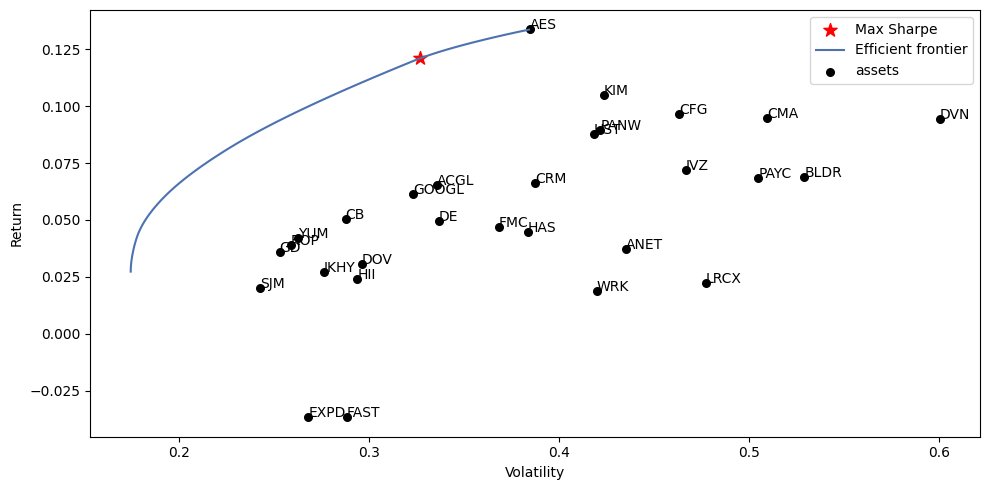

In [31]:
ef = EfficientFrontier(rets, cov)
ef_max_sharpe = ef.deepcopy()
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers=True)
weights = ef_max_sharpe.clean_weights(cutoff=0.005, rounding=2)
ef_max_sharpe.portfolio_performance(verbose=True, risk_free_rate=0.04)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

In [32]:
results = pd.concat(
    [results, pd.DataFrame({'Annualized return':ef_max_sharpe.portfolio_performance(risk_free_rate=risk_free_rate)[0] * 100, 
                            'Annualized volatility':ef_max_sharpe.portfolio_performance(risk_free_rate=risk_free_rate)[1] * 100}, 
                           index=['BL Max Sharpe'])]
)

#### Min Volatility

Expected annual return: 2.7%
Annual volatility: 17.4%
Sharpe Ratio: -0.07

S&P 500 annualized return: 12.25%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 13.23%
Portfolio annualized volatility: 24.91%

Allocation for 10000 USD
AES 1
CB 2
EXPD 10
GD 3
GOOGL 4
HII 2
HST 2
IVZ 1
JKHY 5
PANW 2
SJM 30
YUM 9




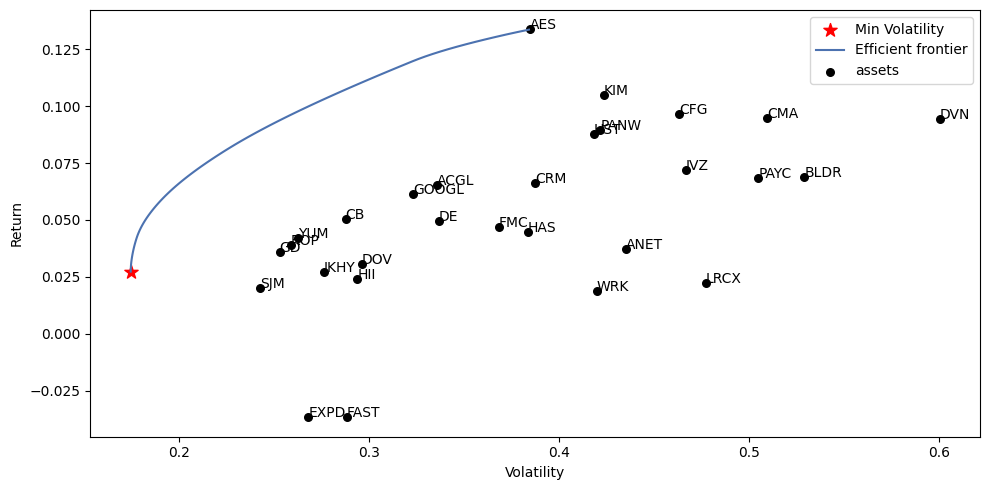

In [33]:
ef = EfficientFrontier(rets, cov)
ef_min_volatility = ef.deepcopy()
ef_min_volatility.min_volatility()
ret_tangent, std_tangent, _ = ef_min_volatility.portfolio_performance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers=True)
weights = ef_min_volatility.clean_weights(cutoff=0.005, rounding=2)
ef_min_volatility.portfolio_performance(verbose=True, risk_free_rate=0.04)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

In [34]:
results = pd.concat(
    [results, pd.DataFrame({'Annualized return':ef_min_volatility.portfolio_performance(risk_free_rate=risk_free_rate)[0] * 100, 
                            'Annualized volatility':ef_min_volatility.portfolio_performance(risk_free_rate=risk_free_rate)[1] * 100}, 
                           index=['BL Min Volatility'])]
)

# 6. Comparison of results

In [35]:
results

,Annualized return,Annualized volatility
S&P 500,12.246279,21.243714
Portfolio,13.230177,24.911719
Efficient Frontier,47.908368,52.403189
Max Sharpe,40.142364,43.086414
Min Volatility,5.081808,17.349640
BL Short and Long,39.393551,64.004479
BL Long only,13.369871,38.398279
BL Max Sharpe,12.110435,32.679803
BL Min Volatility,2.730234,17.438524


# Disclaimer

<i>The information provided here is for general educational and entertainment purposes only. It is presented without any representation or warranties, express or implied, regarding the accuracy, completeness, or applicability of the content to your particular circumstances.

The information should not be construed as professional financial, investment, tax, or legal advice. You should always seek the advice of a qualified professional before making any financial decisions.

Past performance is not a guarantee of future returns. All investments carry risk, including the potential loss of principal invested. There is no assurance that any financial strategy will be successful.

Any references to market performance, securities, investment strategies, portfolios, or asset allocations are provided for illustrative purposes only. They do not constitute a recommendation to buy, sell, or hold a particular investment.

Please consult with a qualified investment professional before making any investment decisions. Use this information at your own risk.

By accessing this repository, you agree to be bound by this disclaimer. If you do not agree with these terms, please do not use this repository.</i>